In [36]:
import pandas as pd
import datetime
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

In [37]:
file_url="covid_19_data.csv"

df=pd.read_csv(file_url)

In [38]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12564,12565,04/06/2020,Wyoming,US,2020-04-06 23:28:35,210.0,0.0,0.0
12565,12566,04/06/2020,Xinjiang,Mainland China,2020-04-06 23:28:35,76.0,3.0,73.0
12566,12567,04/06/2020,Yukon,Canada,2020-04-06 23:28:35,6.0,0.0,0.0
12567,12568,04/06/2020,Yunnan,Mainland China,2020-04-06 23:28:35,184.0,2.0,172.0
12568,12569,04/06/2020,Zhejiang,Mainland China,2020-04-06 23:28:35,1264.0,1.0,1230.0


In [39]:
countries_list=df['Country/Region'].unique()

countries_list

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [40]:
corona_study={}
corona_average_daily_growth={}

for country in countries_list:
    df_country=df[df['Country/Region']==country]
    
    df_country_by_date=df_country.groupby(['ObservationDate']).sum()
    
    corona_study[country]={}
    corona_study[country]['confirmed']=df_country_by_date['Confirmed'].max()
    corona_study[country]['death']=df_country_by_date['Deaths'].max()
    corona_study[country]['recovered']=df_country_by_date['Recovered'].max()
    
    confirmed_series=list(df_country_by_date['Confirmed'])
    corona_average_daily_growth[country]=np.mean(np.diff(confirmed_series))

C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\vjib\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
corona_study['China'] = corona_study.pop('Mainland China')
corona_study['United States of America'] = corona_study.pop('US')
corona_study['United Kingdom'] = corona_study.pop('UK')
corona_study['Macedonia'] = corona_study.pop('North Macedonia')
corona_study['Azerbaijan'] = corona_study.pop(' Azerbaijan')
corona_study['Dominican Rep.'] = corona_study.pop('Dominican Republic')
corona_study['Czechia'] = corona_study.pop('Czech Republic')
corona_study['Bosnia and Herz.'] = corona_study.pop('Bosnia and Herzegovina')
corona_study['Guyana'] = corona_study.pop('French Guiana')
corona_study['eSwatini'] = corona_study.pop('Eswatini')
corona_study['Central African Rep.'] = corona_study.pop('Central African Republic')
corona_study['Eq. Guinea'] = corona_study.pop('Equatorial Guinea')
corona_study['Dem. Rep. Congo'] = corona_study.pop('Congo (Kinshasa)')
corona_study['Timor-Leste'] = corona_study.pop('East Timor')
corona_study['W. Sahara'] = corona_study.pop('Western Sahara')
corona_study['Myanmar'] = corona_study.pop('Burma')
corona_study['S. Sudan'] = corona_study.pop('South Sudan')

corona_average_daily_growth['China'] = corona_average_daily_growth.pop('Mainland China')
corona_average_daily_growth['United States of America'] = corona_average_daily_growth.pop('US')
corona_average_daily_growth['United Kingdom'] = corona_average_daily_growth.pop('UK')
corona_average_daily_growth['Macedonia'] = corona_average_daily_growth.pop('North Macedonia')
corona_average_daily_growth['Azerbaijan'] = corona_average_daily_growth.pop(' Azerbaijan')
corona_average_daily_growth['Dominican Rep.'] = corona_average_daily_growth.pop('Dominican Republic')
corona_average_daily_growth['Czechia'] = corona_average_daily_growth.pop('Czech Republic')
corona_average_daily_growth['Bosnia and Herz.'] = corona_average_daily_growth.pop('Bosnia and Herzegovina')
corona_average_daily_growth['Guyana'] = corona_average_daily_growth.pop('French Guiana')
corona_average_daily_growth['eSwatini'] = corona_average_daily_growth.pop('Eswatini')
corona_average_daily_growth['Central African Rep.'] = corona_average_daily_growth.pop('Central African Republic')
corona_average_daily_growth['Eq. Guinea'] = corona_average_daily_growth.pop('Equatorial Guinea')
corona_average_daily_growth['Dem. Rep. Congo'] = corona_average_daily_growth.pop('Congo (Kinshasa)')
corona_average_daily_growth['Timor-Leste'] = corona_average_daily_growth.pop('East Timor')
corona_average_daily_growth['W. Sahara'] = corona_average_daily_growth.pop('Western Sahara')
corona_average_daily_growth['Myanmar'] = corona_average_daily_growth.pop('Burma')
corona_average_daily_growth['S. Sudan'] = corona_average_daily_growth.pop('South Sudan')

In [42]:
import collections

counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['North Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['Republic of Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 


counter = collections.Counter()
for d in [corona_study['Ireland'],corona_study['Republic of Ireland']]: 
    counter.update(d)
corona_study['Ireland']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Dem. Rep. Congo'],corona_study['Congo (Brazzaville)']]: 
    counter.update(d)
corona_study['Dem. Rep. Congo']=dict(counter) 

counter = collections.Counter()
for d in [corona_study['Dem. Rep. Congo'],corona_study['Republic of the Congo']]: 
    counter.update(d)
corona_study['Dem. Rep. Congo']=dict(counter) 

In [43]:
import geopandas as  gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['confirmed'] = 0
world['death'] = 0
world['recovered'] = 0
world['active_case']=0
world['daily_growth']=0
world['death_rate']=0
world['recovered_rate']=0

In [44]:
for country,row in corona_study.items():
    if (len(world.loc[world['name'] == country])>0):
        country_index=world.loc[world['name'] == country].index[0]
        world.at[country_index,'confirmed']=math.log(corona_study[country]['confirmed']+1)
        world.at[country_index,'death']=math.log(corona_study[country]['death']+1)
        world.at[country_index,'active_case']=math.log(corona_study[country]['confirmed']-corona_study[country]['death']-corona_study[country]['recovered']+1)
        world.at[country_index,'recovered']=math.log(corona_study[country]['recovered']+1)
        world.at[country_index,'death_rate']=math.log(100*(corona_study[country]['death']/corona_study[country]['confirmed'])+1)
        world.at[country_index,'recovered_rate']=math.log(100*(corona_study[country]['recovered']/corona_study[country]['confirmed'])+1)
        if (not math.isnan(corona_average_daily_growth[country])):
            world.at[country_index,'daily_growth']=math.log(corona_average_daily_growth[country]+1)
    else:
        print(country)

Hong Kong
Macau
Singapore
Ivory Coast
Others
Bahrain
San Marino
North Ireland
Monaco
Andorra
Saint Barthelemy
Faroe Islands
Gibraltar
Liechtenstein
Vatican City
Malta
Martinique
Republic of Ireland
Maldives
St. Martin
occupied Palestinian territory
('St. Martin',)
Channel Islands
Holy See
Reunion
Cayman Islands
Guadeloupe
Antigua and Barbuda
Aruba
Jersey
Seychelles
Curacao
Guernsey
Saint Lucia
Saint Vincent and the Grenadines
Congo (Brazzaville)
Guam
Mayotte
Republic of the Congo
The Bahamas
Barbados
The Gambia
Mauritius
Gambia, The
Bahamas, The
Cabo Verde
Cape Verde
Dominica
Grenada
Diamond Princess
Saint Kitts and Nevis
West Bank and Gaza
MS Zaandam
Sao Tome and Principe


Text(0.5, 1.0, 'Visualization of Confirmed case map')

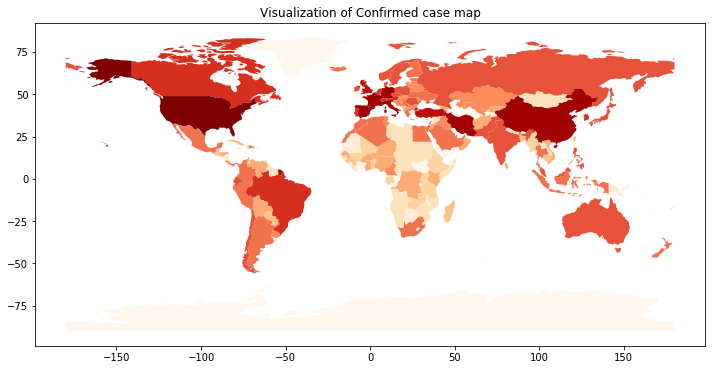

In [45]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='confirmed', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Confirmed case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Active case map')

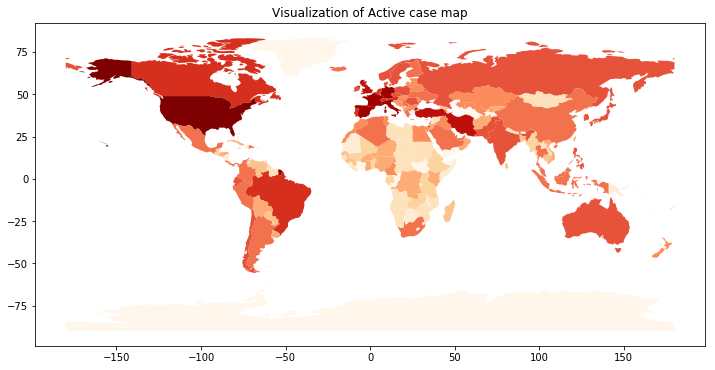

In [46]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='active_case', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Active case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Death case map')

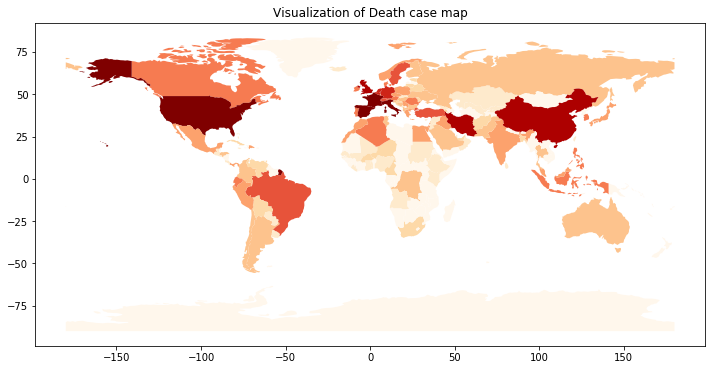

In [47]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Death case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of Recovered case map')

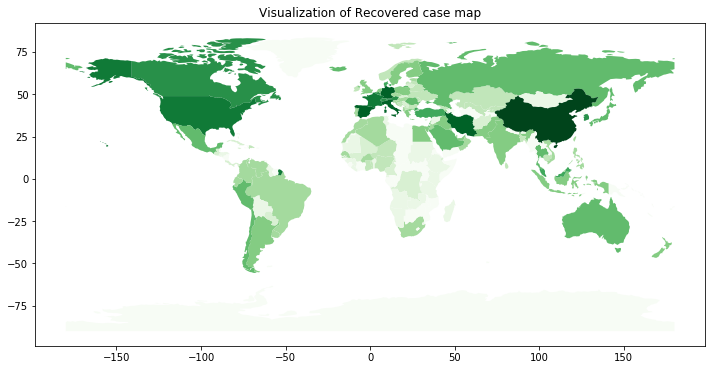

In [48]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of Recovered case map", fontsize=12)

Text(0.5, 1.0, 'Visualization of death rate map')

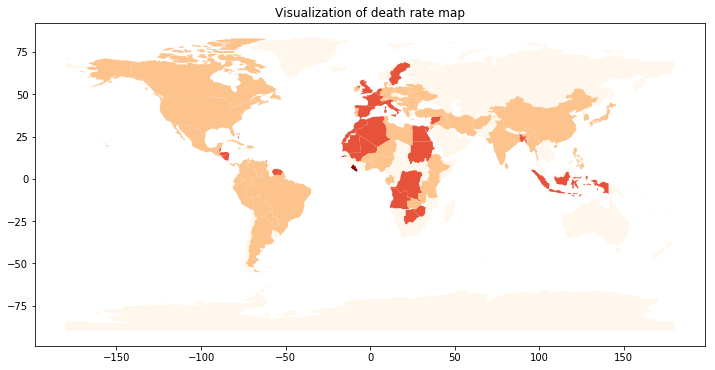

In [49]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='death_rate', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of death rate map", fontsize=12)

Text(0.5, 1.0, 'Visualization of recovered rate map')

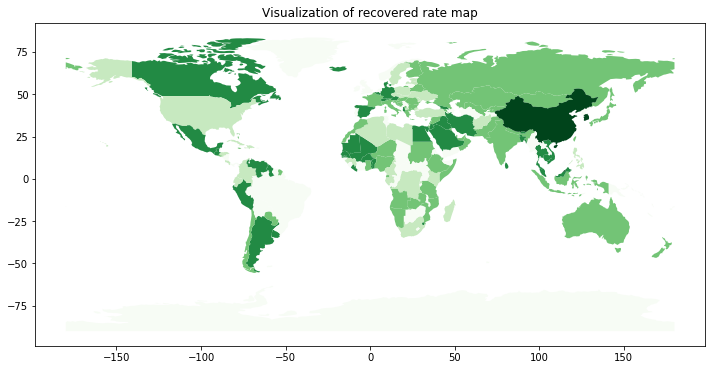

In [50]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='recovered_rate', cmap='Greens',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of recovered rate map", fontsize=12)

Text(0.5, 1.0, 'Visualization of daily growth of confirmed case map')

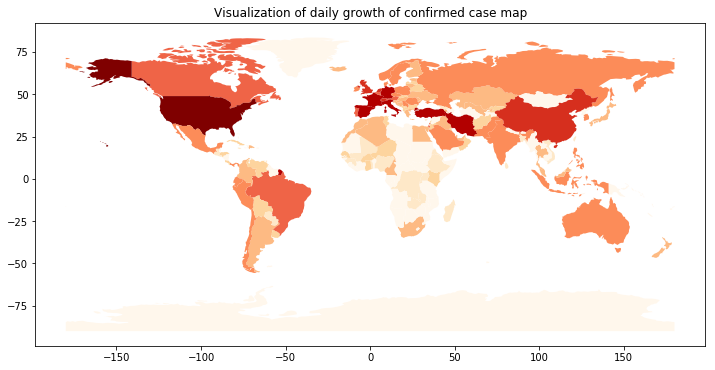

In [51]:
fig, ax = plt.subplots(figsize  = (12, 8))
world.plot(column='daily_growth', cmap='OrRd',ax=ax,figsize=(15, 10));
ax.set_title("Visualization of daily growth of confirmed case map", fontsize=12) 